<h3 align="center">Statistical Analysis and Modeling of Neural Data (NEU 560)</h3>
<h4 align="center">Princeton University, Spring 2018</h4>
<h4 align="center">Jonathan Pillow</h4>

---
## Homework 1: SVD, Least Squares, & PCA
#### Due: Wednesday, 3/7 at 11:59pm

---
### Formatting Instructions
- Please prepare your homework submission completely within this notebook file (*.ipynb*). For each problem or sub-problem, please **limit yourself to one Code cell and/or one Markdown cell** as appropriate (switch between them by using the menu at the top, or the shortcuts `Esc + M` for Markdown and `Esc + Y` for Code). Of course, feel free to use as many cells as you like in the course of working on the homework, just clean and condense once you're done!


- Comments within code cells can be useful for explaining your code and thought process as necessary (anything following a `#` is a comment in Python; you can quickly (un)comment blocks of code by highlighting it and using the shortcut `Cmd + /`. See the posted solution for Homework 0 for examples of the desired formatting).


- Finished homeworks should be **submitted via piazza** as an attachment to a private message to Mike Morais before the due date/time. Late submissions will be penalized 10% per day. (If unable to upload for whatever reason, you may also email your homework to the Mike).


- Make sure the AI is able to run your code! That means **using Python 3.6 and only core packages** (i.e. ones used in class or otherwise very common). If you need a more obscure package for a problem, it will be explicitly imported for you in the homework. 


- Make sure to hit `Kernel -> Restart & Run All` before submitting to catch any final errors! The AIs will be restarting your notebooks before grading them, so all results need to be able to be generated from scratch.


- All problems or sub-problems are worth 1pt each unless otherwise marked.

---
### Using Jupyter Notebooks
To run a cell and advance to the next cell, press `Shift + Return`

To run a cell without advancing to the next cell, press `Control + Return` 

You can find a variety of shortcuts at **Keyboard Shortcuts** in the Help menu above

**If you're confused:** Google and Python are the best of friends! Throw a few words describing your problem into Google and click on the first Stack Overflow link — this will solve 95% of your problems!

If you would simply like to know more about a particular function, press `Shift + Tab` while inside the function to bring up a snippet of documentation; press `Tab` again (while still holding `Shift`) to bring up an even larger box of documentation; a third press of `Tab` will turn the bottom half of your screen into a window with the full documentation for your function (including definitions of the function's inputs, outputs, parameters and their default settings, and often some example code!)

---
Before we start let's run some magic commands to automatically save our progress once a second (with `%autosave 1`), force all graphics from the `matplotlib` package to be displayed inline (with `%matplotlib notebook`), and then import some of our favorite packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

---
## I. Linear Algebra Review

**1) Linear Projection**

*a.* Create two random 10-component vectors $x$ and $u$ using `np.random.randn()`, and make $u$ into
a unit vector.

In [2]:
## Set seed.
np.random.seed(47404)

## Generate data.
x, u = np.random.randn(2,10)

## Normalize u.
u /= np.linalg.norm(u)

*b.* Compute the linear projection of $x$ onto $u$, that is, the component of $x$ that lies in the 1D
subspace defined by $u$. Call it `x_proj`.

In [3]:
x_proj = (x @ u) * u

*c.* Compute the component of $x$ that is orthogonal to $u$. Call it `x_orth`.

In [4]:
x_orth = x - x_proj

*d.* Are `x_proj` and `x_orth` orthogonal? Give evidence for why or why not.

**Answer**: By definition, two vectors are orthogonal if their dot product is equal to 0. `x_proj` and `x_orth` are  orthogonal as $\vec{x_\text{proj}} \cdot \vec{x_\text{orth}} = 0$.

In [5]:
print('x_proj @ x_orth = %0.3f' %np.dot(x_orth, x_proj))

x_proj @ x_orth = -0.000


*e.* Show that the original $x$ is equal to the sum of `x_proj` and `x_orth`.

In [6]:
np.allclose( x, x_proj + x_orth )

True

**2) Linear Independence**

*a.* Are the vectors $\begin{bmatrix}6 \\ -2\end{bmatrix}$ and $\begin{bmatrix}-3 \\ 1\end{bmatrix}$ linearly dependent or linearly independent? (Why or why not?).

**Answer:** The vectors are linearly dependent because one of the vectors can be set equal to the other through the multiciplation of a scalar. In addition, we can show that a matrix formed from horizontally stacking these column vectors has a zero determinant.

In [7]:
## Generate vectors.
a = np.array([[6],[-2]])
b = np.array([[-3],[1]])

## Show trivial linear combination.
print(a + 2 * b)

## Show determinant.
M = np.concatenate([a,b], axis=-1)
print('det|M| = %0.2f'  %np.linalg.det(M))

[[0]
 [0]]
det|M| = 0.00


*b.* What about the vectors $\begin{bmatrix}6 \\ -2 \\ 7\end{bmatrix}$ and $\begin{bmatrix}-3 \\ 1 \\ 7\end{bmatrix}$? Linearly dependent or linearly independent

**Answer:** The vectors are linearly independent as no combination can be used to make one equal to the other.

In [8]:
## Generate vectors.
a = np.array([[6],[-2],[7]])
b = np.array([[-3],[1],[7]])

## Show trivial linear combination.
print(a + 2 * b)

[[ 0]
 [ 0]
 [21]]


**3) Gram-Schmidt orthogonalization (4 points)**

Gram-Schmidt orthogonalization is a classic method for constructing an orthonormal basis from an arbitrary set of $n$ linearly independent vectors. This method proceeds as follows. For the first vector, rescale it to be a unit vector. For each subsequent vector, orthogonalize it with respect to each basis vector already created (i.e., subtract off the component in the direction of each already-created orthonormal basis vectors), and then rescale it to be a unit vector.

Write your own function `gramSchmidt()` to perform Gram-Schmidt orthogonalization. It
should take an arbitrary $n \times m$ matrix as input, and return a matrix $M$ whose columns form
an orthonormal basis for the same subspace spanned by the columns of the matrix passed
in. If the input vectors are linearly dependent (which will occur if you get a zero vector after
orthogonalizing a vector with respect to the previous basis vectors), your function should
output an error (e.g., `Error: Columns are linearly dependent!` ).

Call your function with a random $3 \times 2$ matrix, a random $3 \times 3$ matrix, and a random $3 \times 4$
matrix. Check that in the first two cases, the columns of the matrix $M$ passed back are unit
vectors, and are orthogonal to each other.

(Check that the output matrices have orthonormal columns by computing transpose of $M$ times $M$.)

In [9]:
def gram_schmidt(A):
    '''Perform Gram-Schmidt orthogonalization on a matrix A of dim [N,M].'''
    
    ## Error-handling / metadata.
    assert A.ndim == 2
    B = A.copy()
    N, M = B.shape
    
    ## Scale first column.
    B[:,0] /= np.linalg.norm(B[:,0])
    
    ## Iterate over columns.
    for m in np.arange(1, M):
        
        ## Orthogonalize column wrt previous columns.
        B[:,m] -= (B[:,m] @ B[:,:m]) @ B[:,:m].T
        
        ## Check for linear dependence.
        if np.allclose(B[:,m], np.zeros_like(B[:,m])): 
            raise np.linalg.LinAlgError('Columns of matrix A are linearly dependent!')
            
        ## Scale column.
        B[:,m] /= np.linalg.norm(B[:,m])
        
    return B

## Generate data.
np.random.seed(47404)
A1 = np.random.randn(3,2)
A2 = np.random.randn(3,3)
A3 = np.random.randn(3,4)

## Perform Gram-Schmidt orthogonalization.
A1 = gram_schmidt(A1)    
A2 = gram_schmidt(A2)

try: A3 = gram_schmidt(A3)
except np.linalg.LinAlgError: print('LinAlgError: Columns of matrix A3 are linearly dependent!')
    
## Check for orthonormality.
print( '\nA1^T dot A1' )
print( (A1.T @ A1).round(3) )

print( '\nA2^T dot A2' )
print( (A2.T @ A2).round(3) )

LinAlgError: Columns of matrix A3 are linearly dependent!

A1^T dot A1
[[ 1. -0.]
 [-0.  1.]]

A2^T dot A2
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


---
## II. Singular Value Decomposition (SVD)

**1) Pseudoinverse**

*a.* Write your own function to compute the *pseudoinverse* of a matrix, using no "advanced" commands besides the function `np.linalg.svd()` (which computes the singular value decomposition of a matrix).**(2 points)**


In [10]:
def pinv(A):
    '''Custom pseudo-inverse.'''
    u, s, vt = np.linalg.svd(A)
    sc = np.divide(np.ones_like(s), s, out=np.zeros_like(s), where=s>0)
    return vt.T @ np.diag(sc) @ u.T

*b.* Generate a $3 \times 3$ matrix $A$ that has rank 2. What happens when you try to invert $A$, using the NumPy function `np.linalg.inv()`? Verify that your pseudoinverse function returns the same pseudoinverse as NumPy’s built-in `np.linalg.pinv(A)`.

In [11]:
## Generate 3x3 matrix with rank = 2.
A = np.array([[1, 0, 3],
              [1, 2, 5],
              [0, 1, 1]])

## Attempt to invert with NumPy.
try: np.linalg.inv(A)
except np.linalg.LinAlgError: print('Cannot invert A!')
    
## Verify custom pinv returns some pseudoinverse as NumPy.
print('pinv == np.linalg.pinv?: %s' %np.allclose( pinv(A), np.linalg.pinv(A) ))

Cannot invert A!
pinv == np.linalg.pinv?: True


*c.* Generate a vector $x$ that lies fully within the row space of $A$ (a simple way to do this is just to make a column vector out of one of the rows of $A$). Is $A^\dagger A x$ equal to $x$?

In [12]:
## Generate the vector x.
x = A[0]

## Compute pseudoinverse.
Ainv = pinv(A)

## Compare.
print(np.allclose(x, Ainv @ A @ x))

True


*d.* Generate a vector $y$ that lies in the null space of $A$. Is $A^\dagger A y$ equal to $y$?

In [13]:
## Generate the vector y.
U, s, Vt = np.linalg.svd(A)
y = Vt[0]

print(np.allclose(y, Ainv @ A @ y))

True


*e.* What do we get if we multiply $A^\dagger A (x + y)$ ? Give a one-sentence explanation of what’s happening here.

# COME BACK TO THIS

In [14]:
Ainv @ A @ (x + y)

array([ 0.79032445, -0.30119719,  2.06977615])

**2) Eigenvectors of a psd (positive semi-definite) matrix** 

*a.* Generate a positive semi-definite $5 \times 5$ matrix $A$ by generating a random $5 \times 5$ matrix and multiplying it by its transpose. (The product of a matrix and its transpose is always positive semi-definite!). Now compute the singular vector $\vec x$ with the largest singular value. Verify that this vector is also an eigenvector by showing that $A \vec x$ is equal to $\vec x$ stretched by its singular value (which is thus an eigenvalue).

In [15]:
## Generate matrix.
np.random.seed(47404)
A = np.random.randn(5,5)
A = A.T @ A

## Compute eigenvectors.
U, s, Vt = np.linalg.svd(A)
x = U[:,0]

## Compare values.
print(np.allclose(A @ x, x * s[0]))

True


*b.* Repeat for the eigenvector with the smallest eigenvalue.

In [16]:
x = U[:,-1]
print(np.allclose(A @ x, x * s[-1]))

True


**3) Determinant of a psd matrix**

Write your own function called `mydet()` to compute the determinant of a square, positive definite matrix using no advanced Python commands besides `np.linalg.svd()` (commands like `np.diag()` are fine). Test it out by computing the determinant of the matrix $A$ you defined above and comparing it to `np.linalg.det(A)`.

In [17]:
def mydet(A):
    '''Compute determinent of a positive-semidefinite matrix, A.'''
    _, s, _ = np.linalg.svd(A)
    return np.prod(s)

print(np.allclose( mydet(A), np.linalg.det(A) ))

True


---
## III. Least-Squares Regression

**1) Linear Regression** 
Load the file `regress1data.mat` into Python. This file contains a pair of length-115 vectors: inputs `X` and outputs `Y` that we would like to predict using linear (and nonlinear) regression via least squares.  

**a)** Start by making a scatter plot of variable `Y` as a function of `X` with the command `plt.scatter()`. 


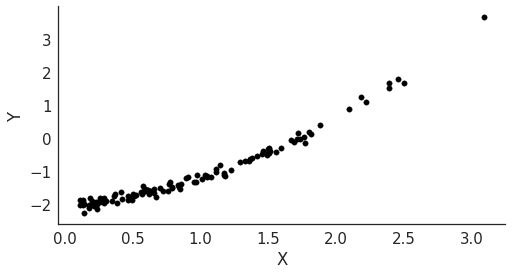

In [18]:
# Here's how to load data from the file regress1.mat
from scipy.io import loadmat
data = loadmat('regress1data.mat')
Y = data['Y']
X = data['X']

# Write code to draw a scatter plot of X vs Y
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.scatter(X.squeeze(), Y.squeeze(), s=30, color='k')
ax.set(xlabel='X', ylabel='Y')
sns.despine()

**b)** Now fit a linear (technically "affine") model of the data using least squares regression.  Start by forming the design matrix `M` that contains the regressors or "inputs"to the regression.  This will be a matrix with two columns and 115 rows (one for each pair $(X,Y)$ of datapoints).  The first column of $M$ should be a vector of ones, and the second column is the input `X`, i.e., 

$$ M = \big[ \vec 1 \quad \vec{X} \big] $$

It should be obvious that multiplying this matrix by a two-vector $\vec w$ will allow us to produce any straight-line fit to the data (where the line isn't required to go through the origin).  The first weight gives the $y$-intercept and the second weight gives the slope of the line, since 

$${y^{predicted}_i} = 1 \cdot w_1 \;\;  + \;\; x_i \cdot w_2 $$ 

for each $i$.

Find the least-squares regression estimate for $\vec w$ using the formula for the least-squares solution $\hat w = (M^T M)^{-1} M^T Y$. 

Plot the datapoints $(X,Y)$ on the same set of axes with a linear model predictions for a grid of $x$ values ranging from $x = −1$ to $x = 5$ in increments of 0.1. 

To do this, make a column vector `xgrid` containing the grid points (created using `np.arange`), and place them in an $n \times 2$ matrix with $1$'s in the first column and `xgrid` in the second column, similar to the design matrix above. Multiply it by the fitted weights $\hat {w}$ to get the predicted $y$ values for each point in `xgrid`. 


**(2 points)**

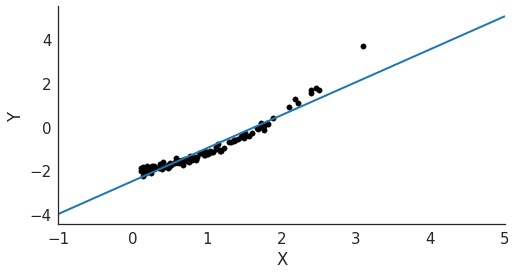

In [19]:
def lstsq(X, y):
    return np.linalg.inv( X.T @ X ) @ X.T @ y

## Preallocate space.
SSE = np.zeros(5)

## Generate design matrix.
M = np.concatenate([np.ones_like(X), X], axis=-1)

## Compute least-squares estimates of weights, w.
w = lstsq(M, Y)

## Compute sum of squared error.
SSE[0] = np.power(Y - M @ w, 2).sum()

## Compute dot product of residuals and design matrix.
ortho = (Y - M @ w).squeeze() @ M

## Generate yhat.
Xhat = np.arange(-1,5.1,0.1).reshape(-1,1)
Mhat = np.concatenate([np.ones_like(Xhat), Xhat], axis=-1)
Yhat = Mhat @ w

## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.scatter(X.squeeze(), Y.squeeze(), s=30, color='k')
ax.plot(Xhat, Yhat.squeeze(), lw=2)
ax.set(xlim=(Xhat.min(), Xhat.max()), xlabel='X', ylabel='Y')
sns.despine()

**2) Polynomial regression ** Now let's use least-squares regression to fit a polynomial to the same data.  Fit a polynomial of order 2, 3, 4, and 5.

For polynomial regression of order $k$, generate the design matrix $M$ as 

$$M = \big[ \vec{1} , \vec{X}, \vec{X^2} , \ldots , \vec{X^k} \big]$$

where $\vec{1}$ is the vector the same length as $\vec{X}$ consisting of of all ones, and $\vec{X}^p$ is the vector $\vec{X}$ with all elements raised to the power $p$. Then find the regression coefficients $\vec{w}$ by minimizing $||\vec{Y} - M\vec{w}||^2$.

**a)** Plot the polynomial fit of each order for a grid of $x$ values ranging from $x = −1$ to $x = 5$ in increments of 0.1, just as you did above for the linear model.


**(2 points)**

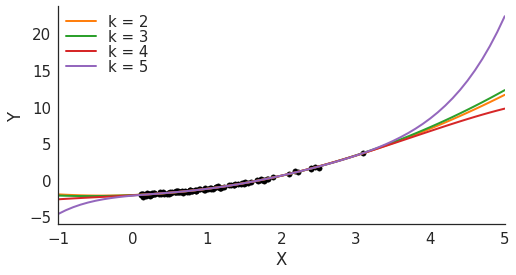

In [20]:
## Initialize arrays.
M = np.concatenate([np.ones_like(X), X], axis=-1)
Xhat = np.arange(-1,5.1,0.1).reshape(-1,1)
Mhat = np.concatenate([np.ones_like(Xhat), Xhat], axis=-1)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.scatter(X.squeeze(), Y.squeeze(), s=30, color='k')
colors = sns.color_palette(n_colors=5).as_hex()[1:]

## Main loop.
for k, color in zip([2, 3, 4, 5], colors):
    
    ## Generate design matrix.
    m = np.power(M[:,1], k).reshape(-1, 1)
    M = np.concatenate([M, m], axis=-1)
    
    ## Compute least-squares estimates of weights, w.
    w = lstsq(M, Y)

    ## Compute sum of squared error.
    SSE[k-1] = np.power(Y - M @ w, 2).sum()
    
    ## Generate yhat.
    mhat = np.power(Mhat[:,1], k).reshape(-1, 1)
    Mhat = np.concatenate([Mhat, mhat], axis=-1)
    Yhat = Mhat @ w 
    
    ## Plot.
    ax.plot(Xhat, Yhat.squeeze(), lw=2, color=color, label='k = %s' %k)

ax.set(xlim=(Xhat.min(), Xhat.max()), xlabel='X', ylabel='Y')
ax.legend(loc=2, labelspacing=0, borderpad=0)
sns.despine()

**b)** On a separate graph, plot the squared error, that is, the sum of squared residual error between the true Y and the predicted Y:

$$ Err = ||\vec Y - \vec Y^{predicted}|| = \sum_{i=1}^N (Y_i - Y_i^{predicted})^2 $$

where the predicted values for each model are given by $ \vec Y^{predicted} = M \hat w$.  

Which model (i.e., which polynomial) do you think is *best*?

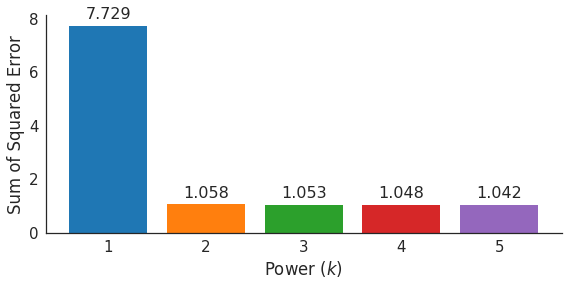

In [21]:
## Plot.
fig, ax = plt.subplots(1,1,figsize=(8,4))
plt.bar(np.arange(5), SSE, color=sns.color_palette(n_colors=5))
ax.set(xticks=np.arange(5), xticklabels=np.arange(5)+1, xlabel='Power ($k$)',
       ylabel='Sum of Squared Error');
for x, y in enumerate(SSE): ax.text(x, y+0.25, '%0.3f' %y, ha='center', fontsize=16)

sns.despine()
plt.tight_layout()

**Answer:** Though the 5th-order polynomial ($k=5$) has the lowest sum of squared error (i.e. best approximates the relationship between $X$ and $Y$), there is high risk it is overfitting the data. As such, the 2nd-order polynomial ($k=2$) likely best balances the tradeoff between prediction (i.e. minimizing SSE) and generalization (i.e. minimizing overfitting). 

**c)**
Verify that the *residual error* vector $\vec{Y} − M\vec{w}$ is orthogonal to each column $M$ (which are known as the regressors or predictors).  

(Recall that our derivation of the regression solution relied on this fact!)

In [22]:
## Initialize arrays.
M = np.ones_like(X)

## Main loop.
for k in [1, 2, 3, 4, 5]:
    
    ## Generate design matrix.
    if k > 1: m = np.power(M[:,1], k).reshape(-1, 1)
    else: m = X.copy()
    M = np.concatenate([M, m], axis=-1)
    
    ## Compute least-squares estimates of weights, w.
    w = lstsq(M, Y)
    
    ## Compute dot product of residuals and design matrix.
    resid = (Y - M @ w).squeeze()
    print('k = %s: %s' %(k, np.round(resid @ M, 3)))

k = 1: [-0. -0.]
k = 2: [-0. -0.  0.]
k = 3: [0. 0. 0. 0.]
k = 4: [-0. -0. -0. -0. -0.]
k = 5: [-0.  0.  0.  0.  0.  0.]


---
## IV. Principal Components Analysis (PCA)

Let's now explore PCA using some real neural data

---
## Loading the data

Load the file `v1data_Graf2011.mat` into Python. You'll find a matrix `Msp` , which contains a $(6400 \times 65)$ matrix of spike responses recorded from 65 neurons in primary visual cortex (V1) over 6400 time bins. Each row is a spike count from the population in a single time bin.  Each column is the spike counts from a single neuron. 

This is *real* neural data, described in [Graf *et al*, 2011](http://www.nature.com/neuro/journal/v14/n2/full/nn.2733.html).

**Some details about this dataset:**
- stimuli were drifting sinusoidal gratings at either $0^o$ or $90^o$ (randomly interleaved)
- spike counts were binned into 40ms bins
- each stimulus lasted 2560ms (64 time bins)
- each stimulus consisted of 1280ms (32 bins) of drifting sine grating, followed by 1280ms (32 bins) of blank screen
- this dataset thus has 100 stimuli, each lasting 64 bins (the first 32 time bins of which had a drifting sinusoid), hence 6400 total time bins
- this is a small subset of the data from the original paper 


---
**1) Load and visualize the data**
  
**a.** Make an image showing the population response to the first 10 stimuli (640 total time bins $\times$ 64 neurons) using `plt.imshow()` (passing the argument `aspect='auto'` will make a more decipherable figure).  Add horizontal lines with `plt.axhline()` showing the start of each stimulus. 

Do the data look reasonable?  Are responses time-locked to the stimulus presentations?

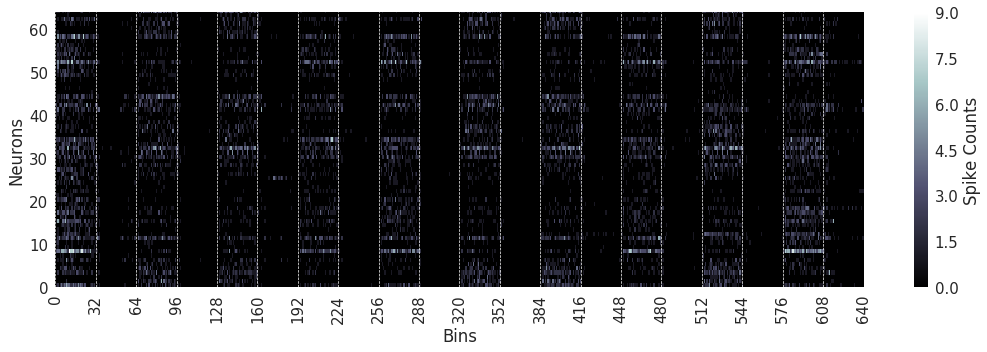

In [23]:
# Read in the matrix Msp from v1_spike_data.mat
from scipy.io import loadmat
spk_data = loadmat('v1data_Graf2011.mat')
M = spk_data['Msp']

fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(M[:640].T, cmap='bone', cbar_kws=dict(label='Spike Counts'), ax=ax)
ax.vlines(np.arange(0,641,32), 0, 64, lw=0.7, linestyle='--', color='w')
ax.set(xticks=np.arange(0,641,32), xticklabels=np.arange(0,641,32), xlabel='Bins',
       ylim=(0,64), yticks=np.arange(0,70,10), yticklabels=np.arange(0,70,10),ylabel='Neurons');

plt.tight_layout()

**b.** 
Plot the responses of neurons #9 and #33 (contained in columns 8 and 32 of `Msp`) over the first 640 time bins. Make the x-axis have units of seconds, and give the plot x and y-axis labels of "time (s)" and "spike count" respectively.  

What do you notice about the responses of these two neurons? Do they appear to be positively or negatively correlated?

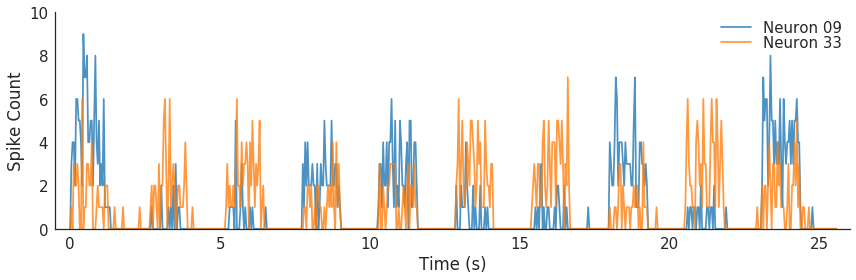

In [24]:
## Extract and prepare data.
x = np.arange(640) * 40e-3
y1 = M[:640,8]
y2 = M[:640,32]

## Plot.
fig, ax = plt.subplots(1,1,figsize=(12,4))
plt.plot(x, y1, alpha=0.8, label='Neuron 09')
plt.plot(x, y2, alpha=0.8, label='Neuron 33')
ax.set(xlim=(-0.5,26), xlabel='Time (s)', ylim=(0,10), ylabel='Spike Count')
ax.legend(loc=1, borderpad=0, labelspacing=0)

sns.despine()
plt.tight_layout()

**Answer:** They appear to be anti-correlated.

**c.**  Make a scatter plot showing the mean spike rate of all 65 neurons in units of spikes/s. (Use `plt.annotate()` to label each scatter points with its neuron index so individual responses can be picked out).  

Are all of the neurons equally active?

---
### Now let's do PCA

**2)**  Start by computing the covariance of the responses. You can do this using `np.cov()`, or by subtracting off the mean response from each neuron (each column of `M`) and computing $\frac{M^TM}{n − 1}$, where $n=6400$ is the number of samples (time bins).

Compute the singular values (eigenvalues), $s_i$, of the covariance matrix, and plot them as a function of $i$. Do the data points live close to a subspace of dimensionality less than 65?

Make a second plot showing the "cumulative fraction of variance accounted for", showing how much of the total response variance one would capture if they kept only the first $k = 1, 2, 3, \ldots , 65$ principal components (PCs).  The $k^{th}$ value of this curve is $\frac{\sum_{i=1}^k s_i}{S_{tot}}$, where $S_{tot}$ is the sum of all the singular values.

How many PCs would one have to keep to capture 50% of the variance of the raw data?  To capture 90% of the variance of the raw data?

**(4 points)**

50%: PC 03
90%: PC 33


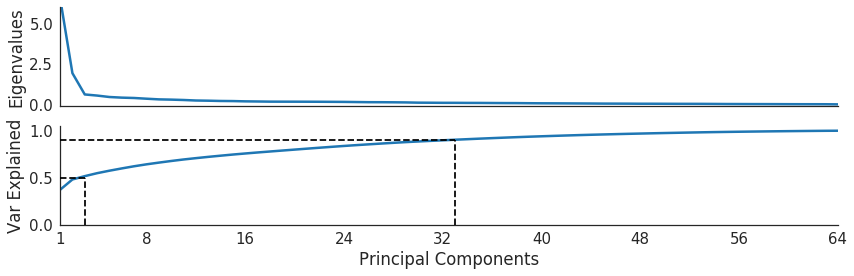

In [25]:
## Compute covariance.
Sigma = np.cov(M.T)

## Compute singular values.
U, s, Vt = np.linalg.svd(Sigma)

## Compute variance explained.
var_exp = np.cumsum(s / s.sum())

## Plot.
fig, axes = plt.subplots(2,1,figsize=(12,4),sharex=True)
axes[0].plot(s, lw=2.5)
axes[1].plot(var_exp, lw=2.5)

## Plot thresholds.
for threshold in [0.5, 0.9]:
    ix = np.argmax(var_exp > threshold)
    axes[1].hlines(threshold, 0, ix, linestyle='--',zorder=10)
    axes[1].vlines(ix, 0, threshold, linestyle='--',zorder=10)
    print('%0.0f%%: PC %0.2d' %(threshold*100, ix+1))
    
## Add plot info.
xticks = np.insert(np.arange(8, 65, 8), 0, 1)
axes[0].set(xlim=(0,63), ylim=(-0.1, 6), ylabel='Eigenvalues')
axes[1].set(xlim=(0,63), xticks=xticks-1, xticklabels=xticks, xlabel='Principal Components', 
            ylim=(0, 1.05), ylabel='Var Explained')
sns.despine()
plt.subplots_adjust(left=0.05, right=0.95, hspace=0.2)

**Answer:** Clearly lives in a space less than 65. 3 PCs for 50%, 33 PCs for 90%.

**3)**  Plot the first PC (i.e., the first eigenvector of the covariance matrix).  This is the pattern (across the 65 neurons) that captures the *most* variance of the time-varying population response.  What does the shape of this eigenvector tell you about the dominant pattern of the response?  (Specifically, what does it tell us that all the elements of this vector have the same sign?)  You might wish to compare this to the plot of the average spike rate across neurons you made above.

*Note:* The sign of the PCs is irrelevant, since the negative of an eigenvector is also an eigenvector, so if you see that your first PC has mostly negative values I'd recommend flipping its sign so that the curve you plot has mostly positive values, which is easier to interpret.

**(2 points)**


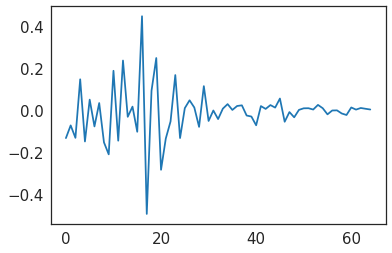

In [26]:
plt.plot(U[0])

**4)** Plot the second PC.  Does it look similar or different to the first PC?  Do neurons 9 and 33 (the two you looked at above) have similar or different loading onto this PC (i.e., do they have weights of the same or opposite sign?)

**5)** Make a scatter plot showing the scatter plot of the data onto the first two principal components.  (That is, plot the dot product of each data vector with the first component versus its dot product with the second component). These projections can be computed very easily by the matrix multiplications $M_0 u_1$ and $M_0 u_2$, where $u_1$ and $u_2$ are the first two PCs, and $M_0$ is $M$ with the mean response of each neuron subtracted off.  

Use `plt.plot()`, requesting circular plot symbols and no connecting lines; set the two axes to use equal scales with `plt.xlim()` and `plt.ylim()`. (Be sure to label your axes).

Describe the structure observed in this plot.  Can you speculate about what is going on? (Refer to experiment description at the top, if necessary).

**(2 points)**

**6)** Use `plt.plot()` to plot the time traces of the projections onto the first two PCs over time for the first 2 stimuli (128 time bins). That is you should have two lines, one for PC1 and the other for PC2, plotted against time.

What information do you think is conveyed by the first projection? The second projection?  

**(2 points)**
